In [1]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.datasets import make_blobs

In [2]:
n_samples=1600
n_clusters=3
n_features =2

In [3]:
# Creating a n_features=2 Dim dataset with centers=3 clusters
Xs, Ys = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters)

In [4]:
mydata= [{"points": x, "label": np.random.randint(n_clusters)} for x in Xs]

In [5]:
print(len(mydata))

1600


In [6]:
print(mydata[15]['points'],mydata[15]['label'])

[ 0.18861832 -0.51218519] 2


In [7]:
C=np.matrix(np.random.rand(n_clusters,n_features))*np.matrix(np.diag(np.max(Xs,0)))
print("Initial Centroids")
print(C)


Initial Centroids
[[6.79293288 8.0623423 ]
 [4.73151424 4.05864418]
 [6.73673807 3.13811916]]


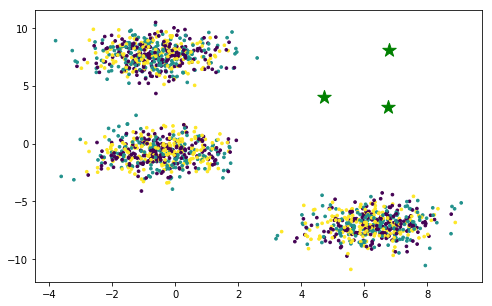

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
fig = plt.figure()

# Plotting along with the Centroids
plt.scatter([actdata['points'][0] for actdata in mydata], [actdata['points'][1] for actdata in mydata],c=[actdata['label'] for actdata in mydata], s=7)

plt.scatter(np.array(C[:,0]), np.array(C[:,1]), marker='*', s=200, c='g')


In [9]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)


In [10]:
def estep(C,X):
    print('*** we are in the E-Step ***')
    #print('C',C)
    #print("shape of X:", len(X))
    for i in range(len(X)):
        #print(X[i])
        distances = dist(X[i]["points"], C)
        cluster = np.argmin(distances)
        X[i]["label"] = cluster
        #print(X[i].label)
    print(" *** Labels updated. E-step done ***")    
    return X    

In [11]:
def mstep(X,n_clusters,n_features):
    print('*** we are in the M-Step ***')
    C = [None]*np.int(n_clusters)
    for i in range(n_clusters):
        points = [X[j]["points"] for j in range(len(X)) if X[j]["label"] == i]
        C[i] = np.mean(points, axis=0) 
        if (np.any(np.isnan(C[i]))):
            C[i]=np.zeros(n_features)
    print(" *** Cluster centers updated. M-step done ***")        
    return np.array(C)


In [12]:
X=deepcopy(mydata)

*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***


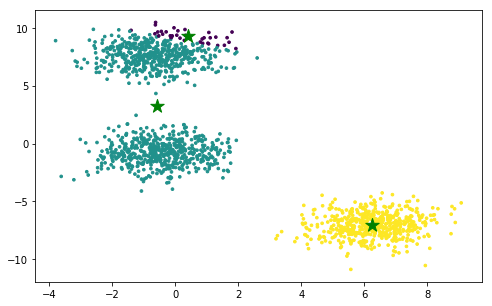

*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***


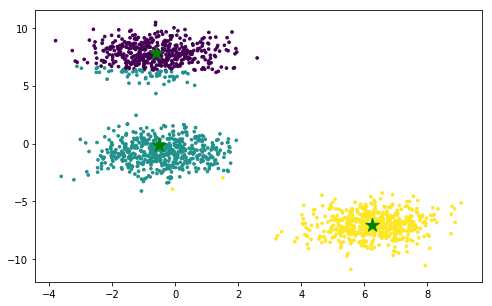

*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***


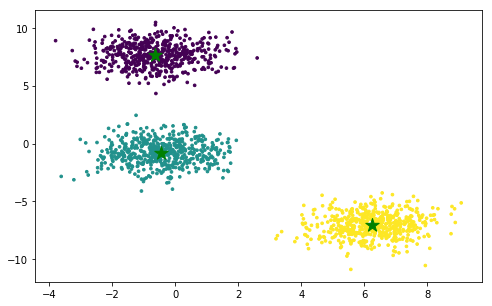

*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***


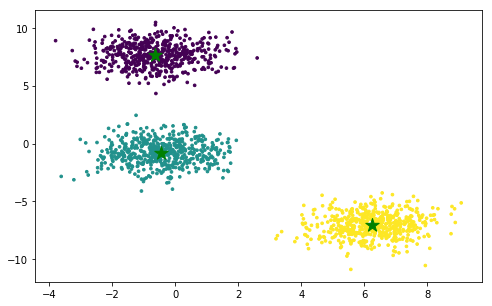

*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***


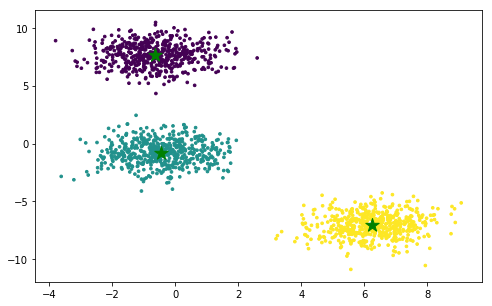

In [13]:
n_iter=5
for iter in range(0, n_iter):  
    X=estep(C,X)
    C = mstep(X,n_clusters,n_features)
    
    plt.rcParams['figure.figsize'] = (8, 5)
    fig = plt.figure()
    plt.scatter([actdata['points'][0] for actdata in X], [actdata['points'][1] for actdata in X],c=[actdata['label'] for actdata in X], s=7)

    plt.scatter(np.array(C[:,0]), np.array(C[:,1]), marker='*', s=200, c='g')
    plt.show()
